In [1]:
import numpy as np
import pandas as pd
import os 
import glob
import pdb
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import scipy as sp
from scipy.special import expit
import sys

In [2]:
sys.path.append(os.path.dirname(os.getcwd()))
from visualisation_and_evaluation.helpers_eval import extract_scores, wa, select_best_run
from visualisation_and_evaluation.helpers_vizualisation import plot_scores

In [3]:
path_scores = r'../eval_scores'
path_figures = r'../figures/summary_figures/chevrier'
if not os.path.isdir(path_figures):
    os.makedirs(path_figures)

files = [x for x in os.listdir(path_scores) if 'full' in x and 'score' in x and 'toy' not in x and 'png' not in x]
selection_method = 'wa' #'wa' (weighted average), 'div' (based on divergence score only)
eval_all = pd.read_csv(os.path.join(path_scores, 'scores_baselines_full.csv'), index_col=[0])
eval_all['silhouette_score_neg'] = -eval_all['silhouette_score']
for fname in files:
    if(fname == 'scores_baselines_full.csv'):
        continue
    df = extract_scores(path_scores, fname)
    # select "the best run"
    df_best = select_best_run(df, method=selection_method)
    df_best = df_best.loc[:,eval_all.columns]
    eval_all = eval_all.append(df_best)
eval_all = eval_all.sort_values(['sample', 'method']).reset_index(drop=True)


C:\Users\heida\Documents\ETH\Deep Learning\2019_DL_Class\visualisation_and_evaluation\helpers_eval.py:205: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.index_name = ['epoch']


In [4]:
# add the weighted averaged score
eval_all['wa'] = eval_all[['divergence_score', 'entropy_score', 'silhouette_score_neg']].apply(lambda x: wa(x), axis=1)
eval_all
eval_all['method'] = [m.split(' full')[0] for m in eval_all['method']]
eval_all

,divergence_score,entropy_score,method,sample,silhouette_score,silhouette_score_neg,wa
0,0.195629,0.632716,autoencoder gan narrower,sample5,0.070364,-0.070364,0.566791
1,0.077308,0.679926,autoencoder gan wider,sample5,0.048765,-0.048765,0.556338
2,0.365523,0.562519,combat,sample5,0.199534,-0.199534,0.576355
3,0.746074,0.606468,mnn,sample5,0.199215,-0.199215,0.623374
4,1.709039,0.408511,raw,sample5,0.191738,-0.191738,0.694017
5,2.004377,0.154429,reg,sample5,0.197928,-0.197928,0.692323
6,0.101398,0.682603,residual gan,sample5,0.096919,-0.096919,0.557118
7,0.392449,0.491119,residual gan wo residuals,sample5,0.046993,-0.046993,0.582198
8,0.165495,0.677695,vanilla gan batchnorm,sample5,-0.119699,0.119699,0.575585
9,0.144000,0.637359,autoencoder gan narrower,sample65,0.080273,-0.080273,0.560204


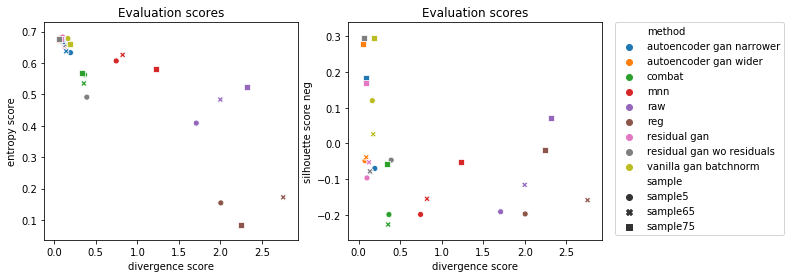

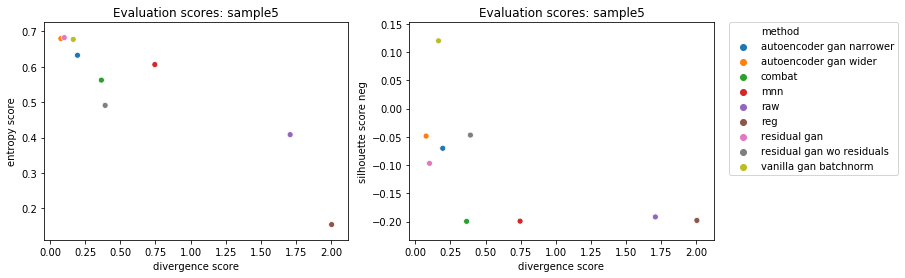

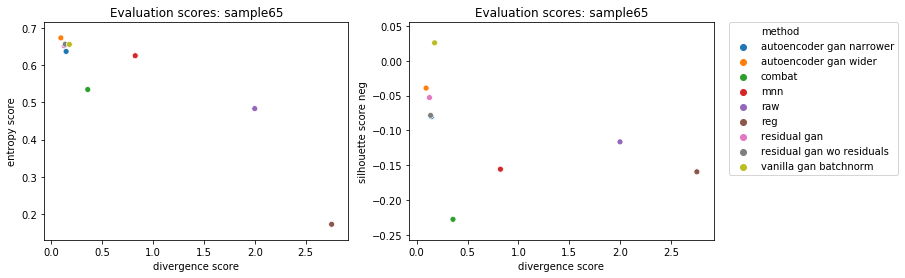

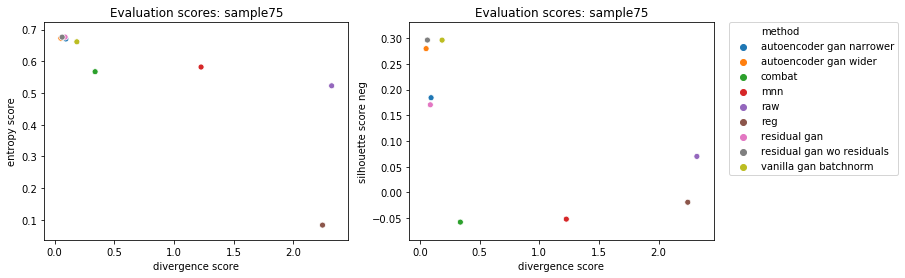

In [5]:
### plot scores
f, axes = plt.subplots(1, 2, figsize=[10,4], sharex=True)
plot_scores(eval_all, xcol='divergence_score', ycol='entropy_score',ax = axes[0], legend=False)
plot_scores(eval_all, xcol='divergence_score', ycol='silhouette_score_neg',ax = axes[1])
plt.savefig(os.path.join(path_figures, 'summary_scores_all_samples.png'),  bbox_inches='tight')

eval_sample5 = eval_all.loc[eval_all['sample']=='sample5',:]
title5 = 'Evaluation scores: sample5'
f, axes = plt.subplots(1, 2, figsize=[12,4], sharex=True)
plot_scores(eval_sample5, xcol='divergence_score', ycol='entropy_score', title=title5, ax = axes[0], legend=False)
plot_scores(eval_sample5, xcol='divergence_score', ycol='silhouette_score_neg', title=title5, ax = axes[1])
plt.savefig(os.path.join(path_figures, 'summary_scores_sample5.png'),  bbox_inches='tight')

eval_sample5 = eval_all.loc[eval_all['sample']=='sample65',:]
title5 = 'Evaluation scores: sample65'
f, axes = plt.subplots(1, 2, figsize=[12,4], sharex=True)
plot_scores(eval_sample5, xcol='divergence_score', ycol='entropy_score', title=title5, ax = axes[0], legend=False)
plot_scores(eval_sample5, xcol='divergence_score', ycol='silhouette_score_neg', title=title5, ax = axes[1])
plt.savefig(os.path.join(path_figures, 'summary_scores_sample65.png'),  bbox_inches='tight')

eval_sample5 = eval_all.loc[eval_all['sample']=='sample75',:]
title5 = 'Evaluation scores: sample75'
f, axes = plt.subplots(1, 2, figsize=[12,4], sharex=True)
plot_scores(eval_sample5, xcol='divergence_score', ycol='entropy_score', title=title5, ax = axes[0], legend=False)
plot_scores(eval_sample5, xcol='divergence_score', ycol='silhouette_score_neg', title=title5, ax = axes[1])
plt.savefig(os.path.join(path_figures, 'summary_scores_sample75.png'),  bbox_inches='tight')

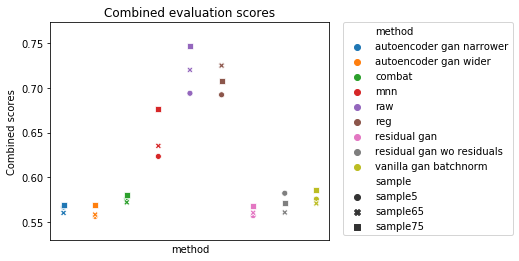

In [6]:
f = plt.figure(figsize=[5,4])
score_plot = sns.scatterplot(x='method', y='wa', data=eval_all,
                hue = 'method', style='sample', legend='brief', ax = None)
handles, names = score_plot.get_legend_handles_labels()
score_plot.legend(handles, names, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
score_plot.set_xticks([])
score_plot.set_ylabel('Combined scores')
#score_plot.set_xticklabels(sp.unique(eval_all['method']), rotation=90)
score_plot.set_title('Combined evaluation scores')
plt.savefig(os.path.join(path_figures, 
                         'summary_scores_all_samples_wa.png'),  bbox_inches='tight')

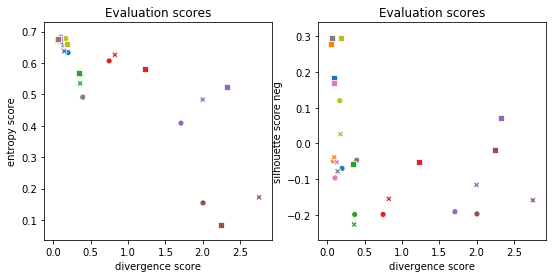

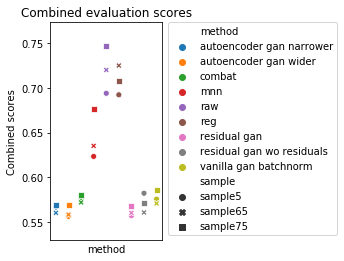

In [7]:
f, axes = plt.subplots(1, 2, figsize=[9,4], sharex=True)
plot_scores(eval_all, xcol='divergence_score', ycol='entropy_score',ax = axes[0], legend=False)
plot_scores(eval_all, xcol='divergence_score', ycol='silhouette_score_neg',ax = axes[1], legend=False)
plt.savefig(os.path.join(path_figures, 'summary_scores_all_samples.png'),  bbox_inches='tight')

f = plt.figure(figsize=[2,4])
score_plot = sns.scatterplot(x='method', y='wa', data=eval_all,
                hue = 'method', style='sample', legend='brief', ax = None)
handles, names = score_plot.get_legend_handles_labels()
score_plot.legend(handles, names, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
score_plot.set_xticks([])
score_plot.set_ylabel('Combined scores')
score_plot.set_xticklabels(sp.unique(eval_all['method']), rotation=90)
score_plot.set_title('Combined evaluation scores')
plt.savefig(os.path.join(path_figures, 
            'summary_scores_all_samples_wa.png'),  bbox_inches='tight')